# QA on Pre-processed External datasets

Feb 20, 2024
- PPMI: HD-BET
- AGE-ility: Freesurfer

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

import sage.constants as C


BASE = Path.home() / "data" / "hdd01" / "1pha" / "brain"

## ADNI

In [5]:
adni_files = list(C.ADNI_DIR.glob("*.nii"))
adni_label = pd.read_csv(C.ADNI_DIR / "ADNI_3T_raw-age&gender-subjectinfo.csv")
donotuse = C.ADNI_DIR / "donotuse-adni.txt"

with donotuse.open(mode="r") as f:
    exclude = [s.strip() for s in f.readlines()]
adni_label

,Subject ID,MIN_DATE,Helper,image_id,Phase,accel_id,Sex,Age-at-scan,Imaging Protocol
0,IMPAIRED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_S_4213,09/02/2011,002_S_421309/02/2011,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
2,002_S_4225,09/21/2011,002_S_422509/21/2011,NaN,ADNI 2,NaN,M,NaN,Field Strength=3.0;Weighting=T1
3,002_S_4262,10/05/2011,002_S_426210/05/2011,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
4,002_S_4270,10/11/2011,002_S_427010/11/2011,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
...,...,...,...,...,...,...,...,...,...
629,137_S_6826,10/17/2019,137_S_682610/17/2019,NaN,ADNI 3,NaN,M,NaN,Field Strength=3.0;Weighting=T1
630,014_S_6831,11/07/2019,014_S_683111/07/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1
631,016_S_6834,11/11/2019,016_S_683411/11/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1
632,016_S_6853,02/04/2020,016_S_685302/04/2020,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1


In [6]:
def parse_adni(s: str | Path) -> str:
    """ Extract subject id 
    e.g. ADNI_002_S_4213_MR_MPRAGE_br_raw_20110903090753647_129_S121168_I254582
    -> return 002_S_4213 """
    if isinstance(s, Path):
        s = s.stem
    subid = "_".join(s.split("_")[1:4])
    return subid

subids_in_dir = [parse_adni(s) for s in adni_files]

In [7]:
actual_subid = set(subids_in_dir)
exclude_subid = set(exclude)
label_subid = set(adni_label["Subject ID"].tolist())

available_subid = (actual_subid & label_subid) - exclude_subid

In [8]:
len(actual_subid), len(label_subid), len(exclude_subid)

(470, 471, 264)

In [9]:
len(actual_subid & label_subid), len(actual_subid & exclude_subid), len((actual_subid - exclude_subid) & label_subid)

(469, 96, 373)

In [10]:
len(actual_subid - label_subid)

1

In [11]:
len(label_subid - actual_subid), len(label_subid & exclude_subid)

(2, 96)

In [12]:
adni_label = adni_label[adni_label["Subject ID"].isin(available_subid)]
adni_label

,Subject ID,MIN_DATE,Helper,image_id,Phase,accel_id,Sex,Age-at-scan,Imaging Protocol
66,021_S_4254,09/26/2011,021_S_425409/26/2011,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
141,073_S_4559,02/24/2012,073_S_455902/24/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
145,073_S_5023,06/13/2012,073_S_502306/13/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
157,094_S_4234,10/18/2011,094_S_423410/18/2011,NaN,ADNI 2,NaN,M,NaN,Field Strength=3.0;Weighting=T1
158,094_S_4503,02/22/2012,094_S_450302/22/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1
...,...,...,...,...,...,...,...,...,...
628,022_S_6822,10/03/2019,022_S_682210/03/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1
629,137_S_6826,10/17/2019,137_S_682610/17/2019,NaN,ADNI 3,NaN,M,NaN,Field Strength=3.0;Weighting=T1
630,014_S_6831,11/07/2019,014_S_683111/07/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1
631,016_S_6834,11/11/2019,016_S_683411/11/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1


In [13]:
adni_label["Phase"].value_counts()

Phase
ADNI 3    324
ADNI 2     49
Name: count, dtype: int64

In [19]:
adni_label.loc[:, "abs_path"] = ""

In [15]:
!ls $C.ADNI_DIR | grep .nii | wc -l

486


In [36]:
def find_id(s: str | Path) -> str:
    """ Extract subject id 
    e.g. ADNI_002_S_4213_MR_MPRAGE_br_raw_20110903090753647_129_S121168_I254582
    -> return 002_S_4213 """
    fname = str(s)
    if isinstance(s, Path):
        s = s.stem
    subid = "_".join(s.split("_")[1:4])
    cond = adni_label["Subject ID"] == subid
    adni_label.loc[:, "abs_path"][cond] = fname

for s in adni_files:
    find_id(s)

/tmp/ipykernel_802651/2103106836.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adni_label.loc[:, "abs_path"][cond] = fname
/tmp/ipykernel_802651/2103106836.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [40]:
adni_label.abs_path.apply(lambda p: Path(p).exists()).sum()

373

In [41]:
adni_label

,Subject ID,MIN_DATE,Helper,image_id,Phase,accel_id,Sex,Age-at-scan,Imaging Protocol,abs_path
66,021_S_4254,09/26/2011,021_S_425409/26/2011,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
141,073_S_4559,02/24/2012,073_S_455902/24/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
145,073_S_5023,06/13/2012,073_S_502306/13/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
157,094_S_4234,10/18/2011,094_S_423410/18/2011,NaN,ADNI 2,NaN,M,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
158,094_S_4503,02/22/2012,094_S_450302/22/2012,NaN,ADNI 2,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
...,...,...,...,...,...,...,...,...,...,...
628,022_S_6822,10/03/2019,022_S_682210/03/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
629,137_S_6826,10/17/2019,137_S_682610/17/2019,NaN,ADNI 3,NaN,M,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
630,014_S_6831,11/07/2019,014_S_683111/07/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...
631,016_S_6834,11/11/2019,016_S_683411/11/2019,NaN,ADNI 3,NaN,F,NaN,Field Strength=3.0;Weighting=T1,/home/1pha/codespace/brain-age-prediction/brai...


In [42]:
adni_label.to_csv(C.ADNI_DIR / "adni_label.csv")

## AGE-ility

In [2]:
AGEILITY_BASE = BASE / "AGE-ility" / "fs-ss"
ageility_label = (AGEILITY_BASE / "..").resolve() / "DataDescriptorFile.xlsx"
ageility_label = pd.read_excel(ageility_label, skiprows=2, header=1).iloc[:, :10]
ageility_label

/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Subject_ID,Age,Gender 1=Male,Handedness 1=Right,Time12 (days),Time23 (days),Ghosting,Wrapping,Shading / ringing,Spiking
0,1,34,2,1,12,200,1,2,4,1
1,2,27,1,1,4,182,1,1,3,1
2,3,27,2,1,7,151,1,1,3,1
3,4,35,2,1,14,103,1,1,3,1
4,5,34,1,1,21,111,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...
126,127,15,1,2,8,20,1,1,3,3
127,128,16,1,1,7,19,1,1,3,1
128,129,32,1,1,52,2,1,1,3,1
129,130,18,1,1,5,11,1,1,3,1


<Axes: >

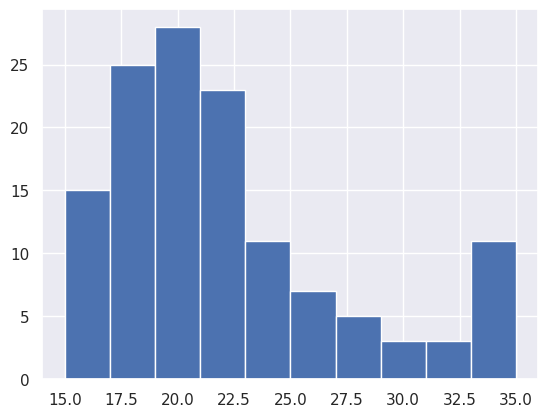

In [3]:
ageility_label.Age.hist()

## PPMI

In [22]:
PPMI_BASE = C.EXT_BASE / "PPMI"
ppmi_label = PPMI_BASE / "ppmi_label.csv"
ppmi_label = pd.read_csv(ppmi_label)
ppmi_label = ppmi_label.sort_values(by=["Image Data ID"]).reset_index(drop=True)
ppmi_label

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,abs_path
0,I330119,3104,Control,M,72,BL,MRI,T2 in T1-anatomical space,Processed,2/14/2011,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
1,I330120,3104,Control,M,72,BL,MRI,T1-anatomical,Processed,2/14/2011,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
2,I330131,3104,Control,M,73,V04,MRI,T2 in T1-anatomical space,Processed,4/20/2012,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
3,I330133,3104,Control,M,73,V04,MRI,T1-anatomical,Processed,4/20/2012,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
4,I330400,3105,PD,M,69,BL,MRI,T2 in T1-anatomical space,Processed,3/24/2011,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,I994889,4029,PD,M,53,V10,MRI,T2 in T1-anatomical space,Processed,10/18/2016,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
1670,I994948,3588,PD,F,53,V10,MRI,T1-anatomical,Processed,9/16/2016,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
1671,I994958,4081,PD,M,76,V10,MRI,T1-anatomical,Processed,8/09/2017,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...
1672,I994989,4081,PD,M,76,V10,MRI,T2 in T1-anatomical space,Processed,8/09/2017,NiFTI,1/02/2024,/home/1pha/codespace/brain-age-prediction/brai...


In [23]:
ppmi_binary = ppmi_label[ppmi_label.Group.isin(["Control", "PD"])]

In [25]:
ppmi_binary.to_csv(PPMI_BASE / "ppmi_binary_label.csv", index=False)

In [26]:
ppmi_binary.Group.value_counts()

Group
PD         1086
Control     270
Name: count, dtype: int64

In [1]:
from sage.data.ppmi import PPMIClassification, PPMIAgeRegression

ds = PPMIAgeRegression()

INFO:sage.data.dataloader:Setting up PPMI_AGE Dataset
INFO:sage.data.dataloader:Total 1506 files of train exist


In [2]:
ds[0]

{'brain': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          ...,
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...

In [26]:
dt = pd.to_datetime(ppmi_label["Acq Date"]).dt

zfill = lambda x: x.zfill(2)
date_parse = dt.year.astype(str) + "-" + dt.month.astype(str).apply(zfill) + "-" + dt.day.astype(str).apply(zfill)

In [49]:
ppmi_files = list(((PPMI_BASE / "..").resolve() / "PPMI").rglob("*.nii"))
ppmi_files = sorted(ppmi_files, key=lambda p: p.stem.split("_")[-1])
len(ppmi_files)

1674

In [55]:
ppmi_label["Image Data ID"].tolist() == list(map(lambda p: p.stem.split("_")[-1], ppmi_files))

True

In [56]:
ppmi_label["abs_path"] = ppmi_files

In [59]:
ppmi_label.abs_path.apply(lambda p: p.exists()).sum()

1674

In [63]:
ppmi_label.Group.unique()

array(['Control', 'PD', 'SWEDD', 'Prodromal'], dtype=object)

In [46]:
imids = set(map(lambda p: p.stem.split("_")[-1], ppmi_files))
labids = set(ppmi_label["Image Data ID"].tolist())

len(imids & labids)

1674

In [66]:
ppmi_label.to_csv((PPMI_BASE / ".." / "PPMI").resolve() / "ppmi_label.csv", index=False)

In [ ]:
t1_ppmi = ppmi_label[ppmi_label.Description == "T1-anatomical"]
gb_t1 = t1_ppmi.groupby(["Subject", "Acq Date"]).agg({
    "Age": lambda x: x.iloc[0],
    "Group": lambda x: list(set(x))[0],
    "Sex": lambda x: x.iloc[0]
})

In [ ]:
gb_t1

Age      Group Sex
Subject Acq Date                      
3101    8/17/2012    50      SWEDD   M
        8/20/2014    52      SWEDD   M
3102    11/23/2010   64         PD   M
        2/06/2013    66         PD   M
3104    2/14/2011    72    Control   M
...                 ...        ...  ..
85236   1/25/2017    69  Prodromal   M
        4/15/2015    67  Prodromal   M
85242   2/03/2016    65  Prodromal   M
        2/08/2017    66  Prodromal   M
        2/18/2015    64  Prodromal   M

[837 rows x 3 columns]

In [ ]:
gb_label = ppmi_label.groupby("Subject").agg({"Group": lambda x: list(set(x))[0],
                                              "Age": lambda x: x.iloc[0],
                                              "Sex": lambda x: x.iloc[0],})

In [ ]:
gb_label.Group.value_counts()

Group
PD           194
Control       75
Prodromal     46
SWEDD         41
Name: count, dtype: int64

[Text(0.5, 1.0, 'PPMI Age Distribution')]

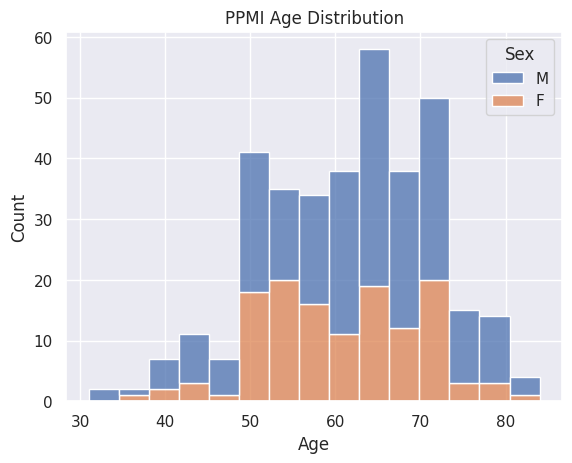

In [ ]:
ax = sns.histplot(data=gb_label, x="Age", hue="Sex", bins=15, multiple="stack")
ax.set(title="PPMI Age Distribution")

[Text(0.5, 1.0, 'PPMI Age Distribution')]

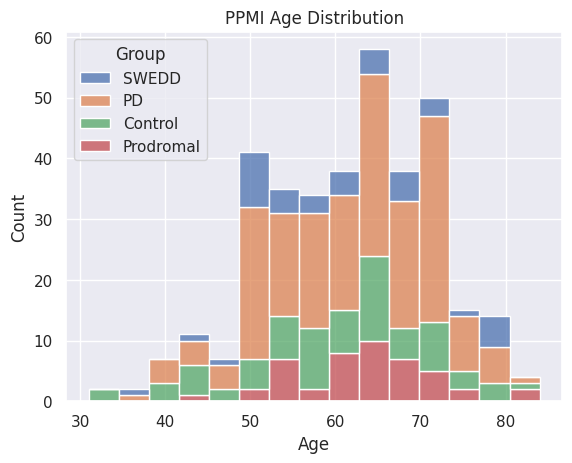

In [ ]:
ax = sns.histplot(data=gb_label, x="Age", hue="Group", bins=15, multiple="stack")
ax.set(title="PPMI Age Distribution")